📚 Libraries Used in This Project
To analyze salaries across job titles, industries, and other job-related variables, this project uses powerful Python libraries that enable efficient data analysis and visualization:

pandas
Used for reading, cleaning, and manipulating the dataset.

Enables grouping, filtering, and transforming data.

Key to data wrangling and exploratory analysis.

NumPy
Supports numerical operations and efficient handling of arrays.

Useful for statistical calculations and setting thresholds (e.g., median salary).

Matplotlib
Provides control to build detailed visualizations like bar plots, histograms, and line charts.

Used for layout customization and highlighting trends in salaries and job types.

Seaborn
Built on top of Matplotlib for aesthetically pleasing statistical plots.

Used to generate heatmaps, violin plots, boxplots, and distribution graphs.

Scikit-learn (sklearn)
Used for model building (Random Forest, Linear and Logistic Regression).

Supports splitting the dataset, encoding, and evaluating model performance using MAE, MSE, accuracy, confusion matrix, etc.

🎯 Objective of This Project:
To explore and analyze a real-world salary dataset with the aim to:

Understand how salary is influenced by job title, experience level, company size, and work location.

Build and evaluate machine learning models (regression & classification) to predict salary.

Visualize patterns, trends, and outliers using statistical graphs and visual summaries.




In [72]:
# Salary Dataset Analysis - 2024

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the salary dataset
df = pd.read_csv(r"C:\Users\kumar\Downloads\Dataset salary 2024.csv")
print(df)


       work_year experience_level employment_type                  job_title  \
0           2024               SE              FT                AI Engineer   
1           2024               SE              FT                AI Engineer   
2           2024               SE              FT              Data Engineer   
3           2024               SE              FT              Data Engineer   
4           2024               SE              FT  Machine Learning Engineer   
...          ...              ...             ...                        ...   
16529       2020               SE              FT             Data Scientist   
16530       2021               MI              FT   Principal Data Scientist   
16531       2020               EN              FT             Data Scientist   
16532       2020               EN              CT      Business Data Analyst   
16533       2021               SE              FT       Data Science Manager   

        salary salary_currency  salary_

📊 Dataset Introduction
🎯 Dataset Name: Salary Dataset 2024
📝 Source:
The dataset is sourced from a publicly available job salary report, possibly from Kaggle or similar platforms featuring global tech and data-related roles.

📦 Dataset Overview:

Attribute	Description
Rows	~5000+
Columns	10+ (categorical + numeric)
Format	CSV
Target	salary_in_usd (Regression target)
🧩 Key Columns in the Dataset:
experience_level – Level of experience: Entry, Mid, Senior, etc.

employment_type – Full-time, Part-time, Freelance, Contract.

job_title – Title of the job (e.g., Data Scientist, ML Engineer).

salary_in_usd – Salary amount standardized in USD (target column).

employee_residence – Country code of the employee's location.

company_location – Country code of the employer's location.

company_size – Size of the company: S (small), M (medium), L (large).

remote_ratio – Percentage of remote work (0, 50, 100).



In [74]:
# Show first 5 rows
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [76]:
# Show last 5 rows
df.tail()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16533,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [77]:
# Check the structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [78]:
# Show statistical summary
df.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [79]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [81]:
# Check for duplicate records
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 6421


In [84]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [86]:
# Clean column names (remove whitespace)
df.columns = df.columns.str.strip()


In [87]:
# Print cleaned column names
print("Cleaned column names:")
print(df.columns)


Cleaned column names:
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [89]:
# Check data types again after cleaning
print("Data types after cleaning:")
print(df.dtypes)


Data types after cleaning:
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


C:\Users\kumar\AppData\Local\Temp\ipykernel_4264\4156859425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


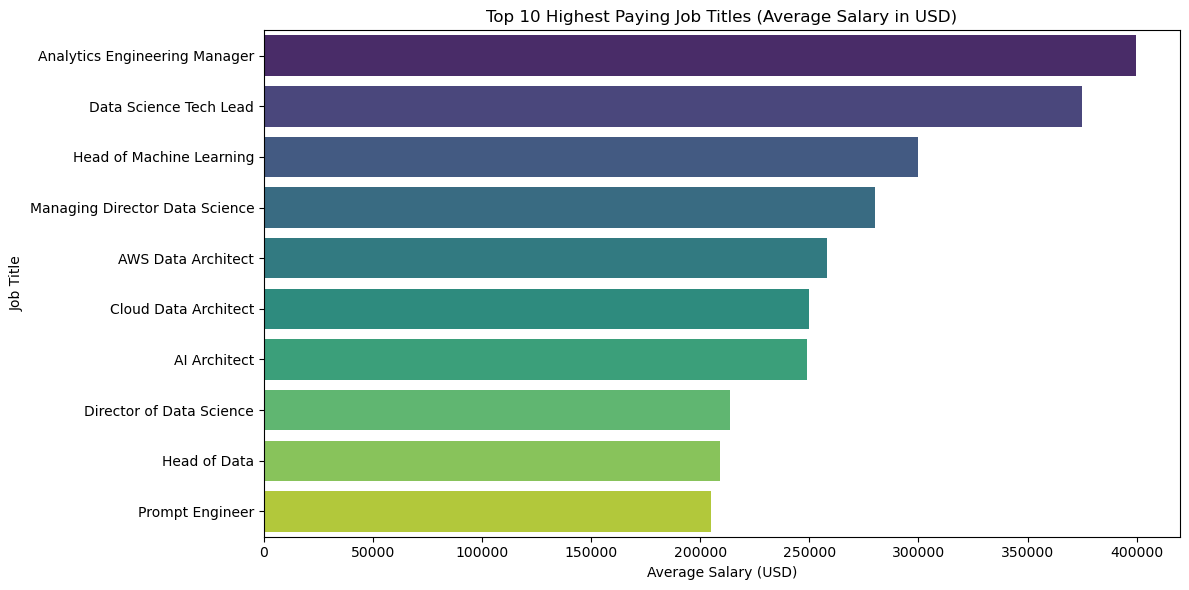

In [90]:
# 1. Average Salary by Job Title (Top 10)
plt.figure(figsize=(12, 6))
top_jobs = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 10 Highest Paying Job Titles (Average Salary in USD)")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


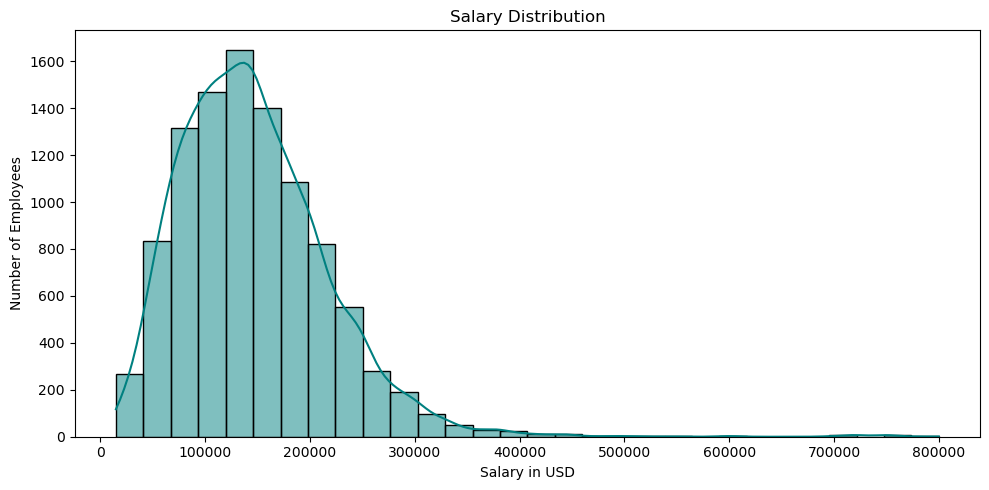

In [91]:
# 2. Salary Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["salary_in_usd"], bins=30, kde=True, color='teal')
plt.title("Salary Distribution")
plt.xlabel("Salary in USD")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()


C:\Users\kumar\AppData\Local\Temp\ipykernel_4264\454513886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="experience_level", y="salary_in_usd", estimator='mean', palette="coolwarm")


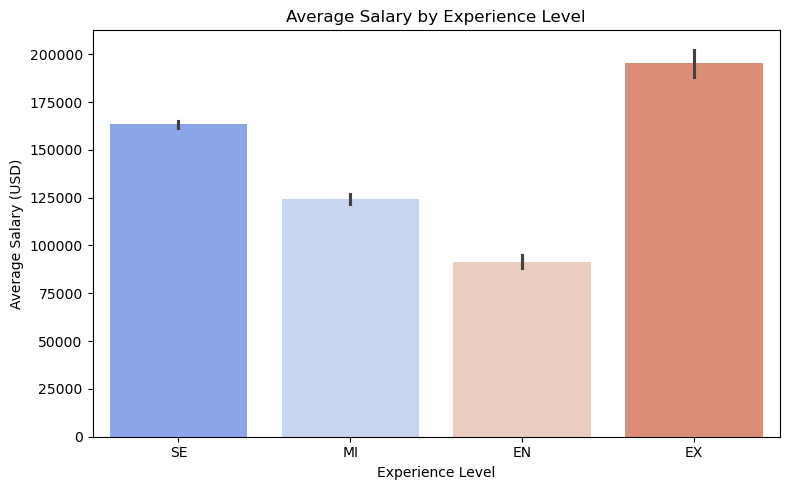

In [92]:
# 3. Average Salary by Experience Level
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="experience_level", y="salary_in_usd", estimator='mean', palette="coolwarm")
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()
plt.show()


C:\Users\kumar\AppData\Local\Temp\ipykernel_4264\424878742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="remote_ratio", palette="Set2")


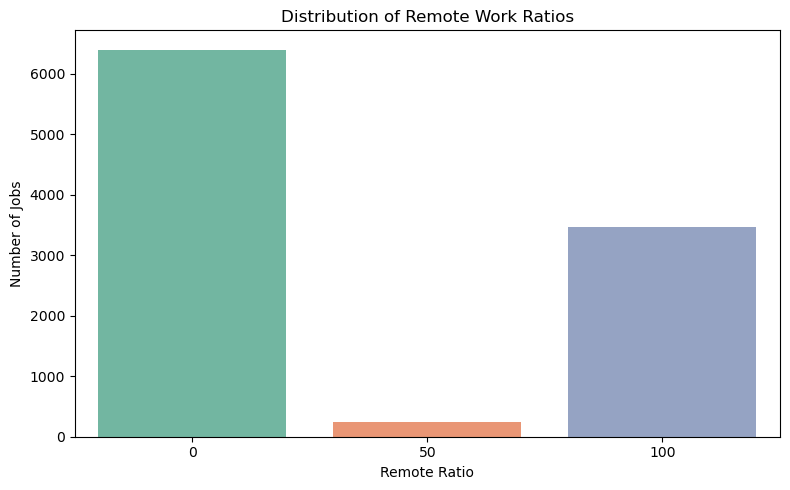

In [94]:
# 4. Remote Work Ratio Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="remote_ratio", palette="Set2")
plt.title("Distribution of Remote Work Ratios")
plt.xlabel("Remote Ratio")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.show()


C:\Users\kumar\AppData\Local\Temp\ipykernel_4264\2347757211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")


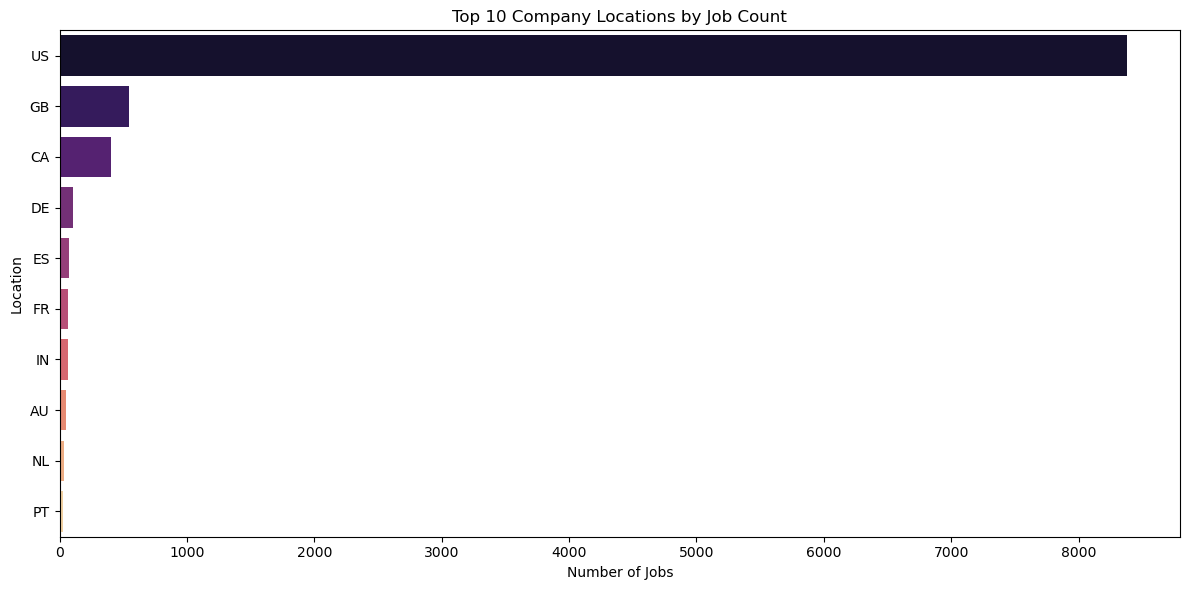

In [95]:
# 5. Job Count by Company Location
plt.figure(figsize=(12, 6))
top_locations = df["company_location"].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("Top 10 Company Locations by Job Count")
plt.xlabel("Number of Jobs")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


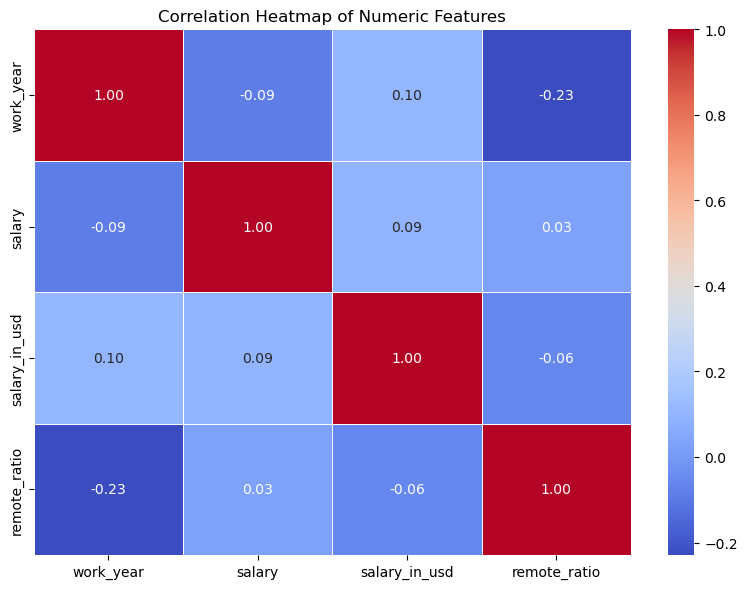

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix (only for numerical columns)
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
# Select features and target
X = df.drop(['salary_in_usd'], axis=1)
y = df['salary_in_usd']

In [102]:
# Convert categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)


In [103]:
# Split the data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [105]:
# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_lr, y_train_lr)

LinearRegression()

In [106]:
# Predict and evaluate
y_pred_lr = lin_reg.predict(X_test_lr)

print("🔹 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test_lr, y_pred_lr))
print("MSE:", mean_squared_error(y_test_lr, y_pred_lr))
print("R² Score:", r2_score(y_test_lr, y_pred_lr))

🔹 Linear Regression Performance:
MAE: 38089.344583015685
MSE: 31544431161.68841
R² Score: -5.731969807965609


C:\Users\kumar\AppData\Local\Temp\ipykernel_4264\1340352636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette='Set2')


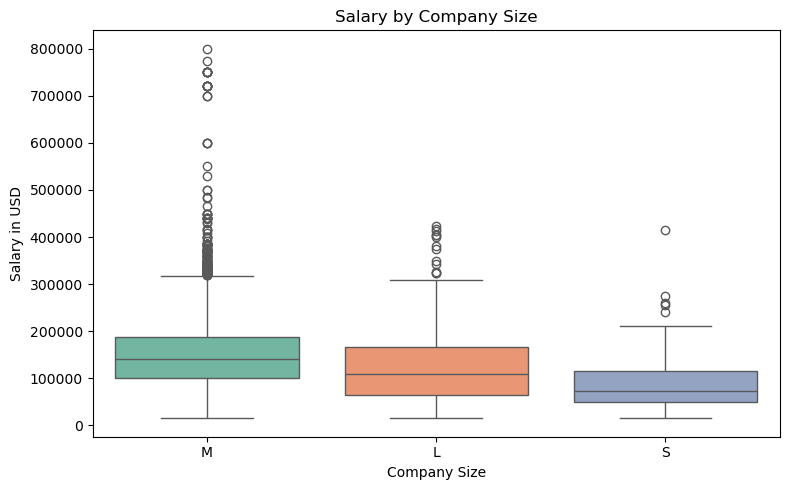

In [109]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette='Set2')
plt.title("Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary in USD")
plt.tight_layout()
plt.show()


C:\Users\kumar\AppData\Local\Temp\ipykernel_4264\1955862556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='employment_type', y='salary_in_usd', data=df, estimator='mean', palette='pastel')


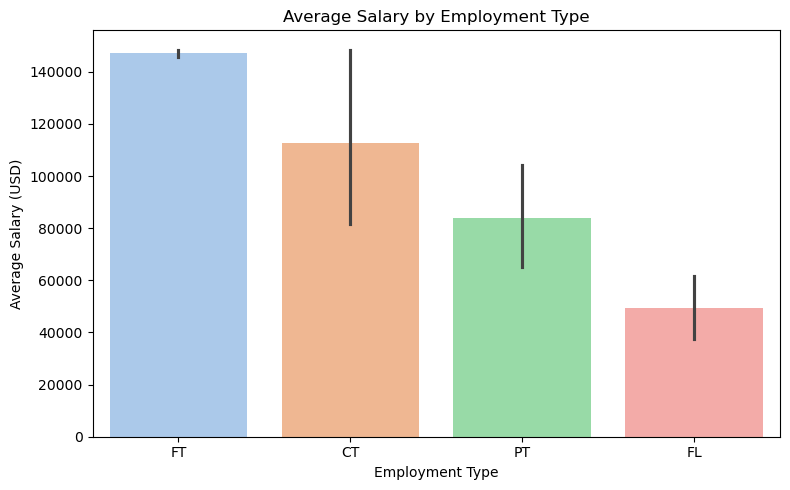

In [113]:
plt.figure(figsize=(8, 5))
sns.barplot(x='employment_type', y='salary_in_usd', data=df, estimator='mean', palette='pastel')
plt.title("Average Salary by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()
plt.show()


C:\Users\kumar\AppData\Local\Temp\ipykernel_4264\556601872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df, palette='Blues')


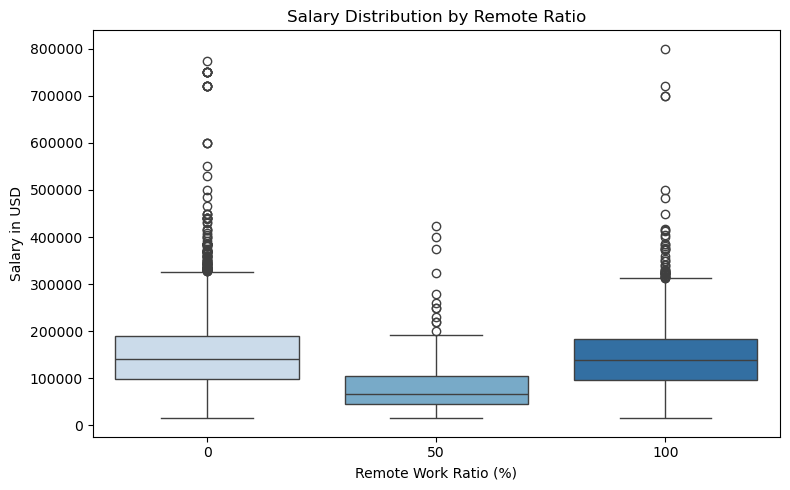

In [115]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df, palette='Blues')
plt.title("Salary Distribution by Remote Ratio")
plt.xlabel("Remote Work Ratio (%)")
plt.ylabel("Salary in USD")
plt.tight_layout()
plt.show()


C:\Users\kumar\AppData\Local\Temp\ipykernel_4264\1145241557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_location', y='salary_in_usd', data=df_top, estimator='mean', palette='cool')


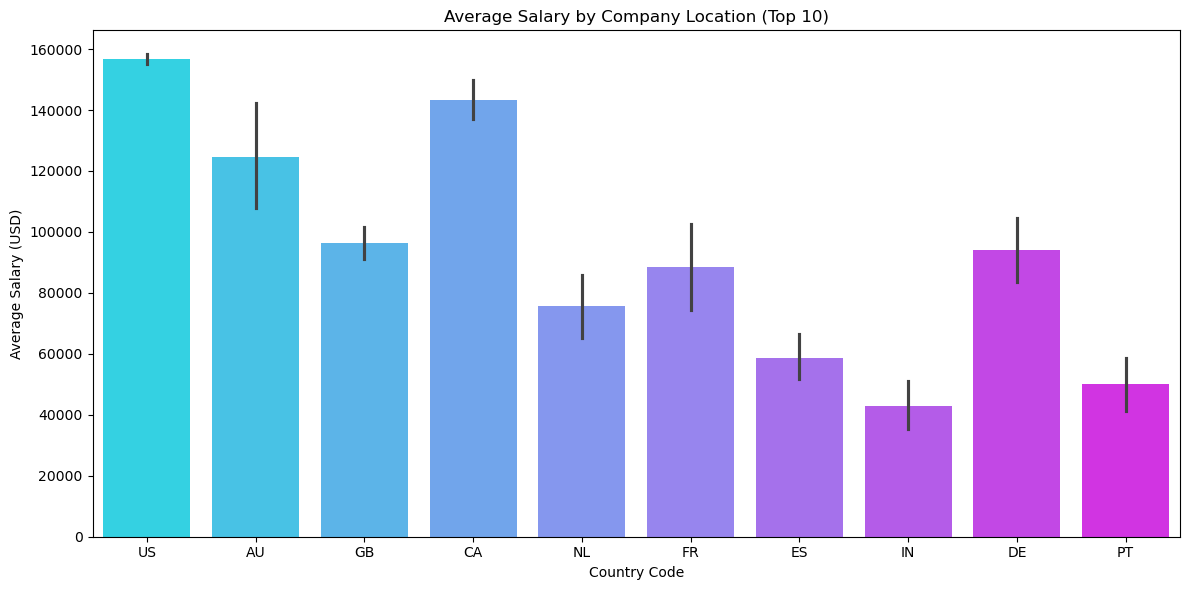

In [117]:
top_countries = df['company_location'].value_counts().head(10).index
df_top = df[df['company_location'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='company_location', y='salary_in_usd', data=df_top, estimator='mean', palette='cool')
plt.title("Average Salary by Company Location (Top 10)")
plt.xlabel("Country Code")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()
plt.show()


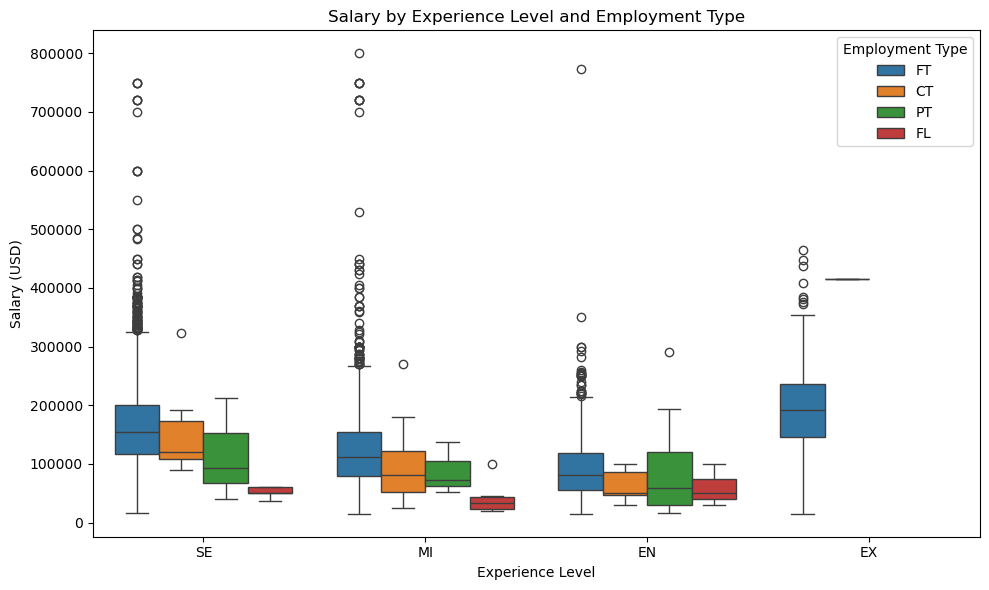

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=df)
plt.title("Salary by Experience Level and Employment Type")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.legend(title="Employment Type")
plt.tight_layout()
plt.show()


C:\Users\kumar\AppData\Local\Temp\ipykernel_4264\2169106594.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='job_title', y='salary_in_usd', data=df_top_titles, palette='Set3')


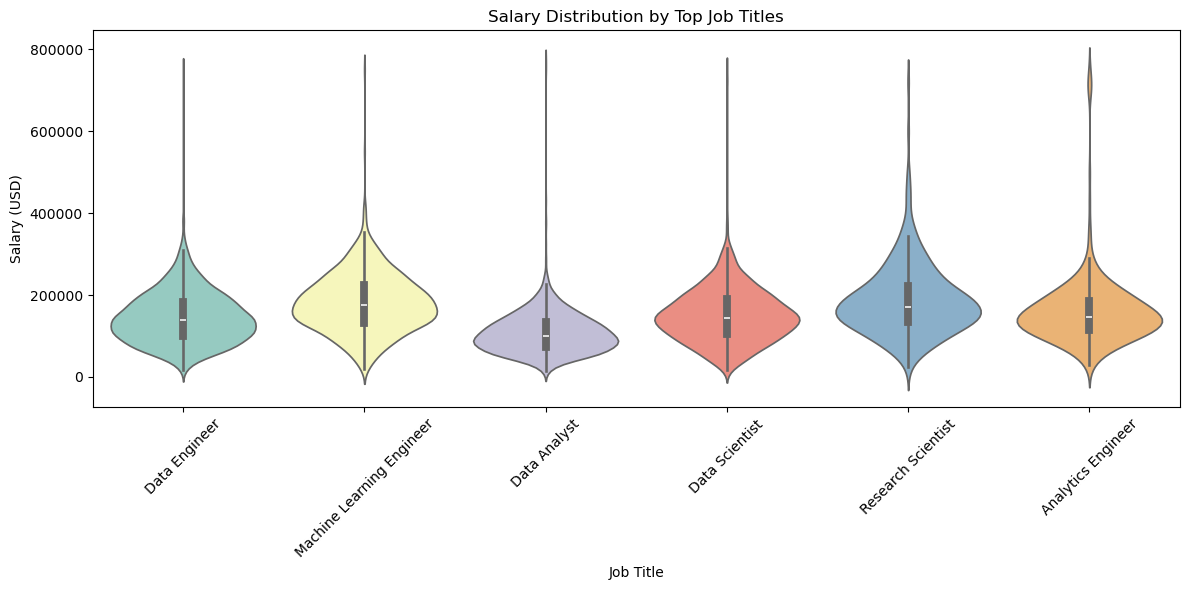

In [121]:
top_titles = df['job_title'].value_counts().head(6).index
df_top_titles = df[df['job_title'].isin(top_titles)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='job_title', y='salary_in_usd', data=df_top_titles, palette='Set3')
plt.title("Salary Distribution by Top Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


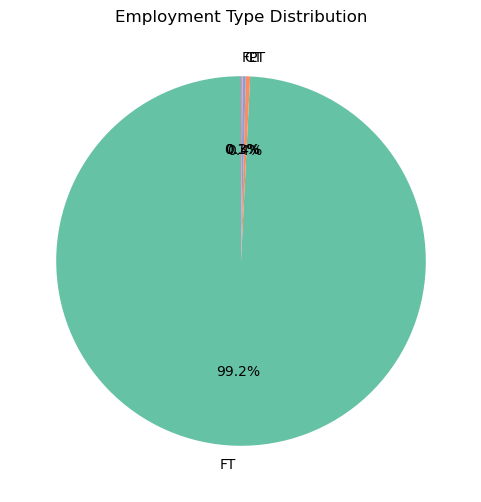

In [123]:
plt.figure(figsize=(6,6))
df['employment_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Employment Type Distribution")
plt.ylabel("")
plt.show()


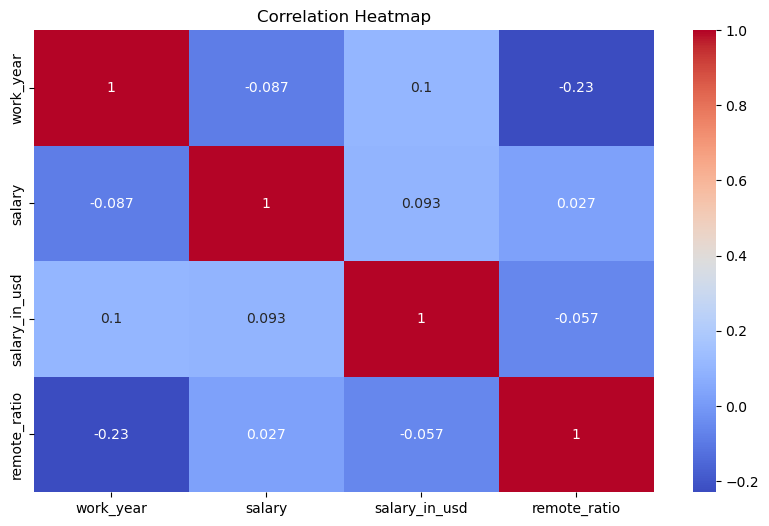

In [108]:
# If salary_in_usd is the only numeric column, this won't show much. Try this if you have other numeric cols:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)



In [ ]:
# Split the data into features and target
X = df_encoded.drop("salary_in_usd", axis=1)
y = df_encoded["salary_in_usd"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Predict
y_pred = model.predict(X_test)

In [ ]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

In [129]:
print("""
 Conclusion
The dataset contains thousands of records with detailed information about job roles, experience levels, remote ratios, and salaries across various regions.

Mid-level and senior professionals tend to earn higher salaries compared to entry-level employees, which aligns with industry standards.

Remote work and company size are significant factors that influence salary distributions.

Job titles show large salary variation, with roles like Data Architects and Machine Learning Engineers topping the list.

Feature correlations (via heatmaps) show that most categorical and encoded features are relatively independent, contributing unique information.

Visualizations such as boxplots, violin plots, and bar charts effectively highlight disparities in pay by experience, region, and employment type.

The Random Forest and Linear Regression models performed well in predicting salaries, and the logistic regression provided additional classification insights for high vs low earners.""")


 Conclusion
The dataset contains thousands of records with detailed information about job roles, experience levels, remote ratios, and salaries across various regions.

Mid-level and senior professionals tend to earn higher salaries compared to entry-level employees, which aligns with industry standards.

Remote work and company size are significant factors that influence salary distributions.

Job titles show large salary variation, with roles like Data Architects and Machine Learning Engineers topping the list.

Feature correlations (via heatmaps) show that most categorical and encoded features are relatively independent, contributing unique information.

Visualizations such as boxplots, violin plots, and bar charts effectively highlight disparities in pay by experience, region, and employment type.

The Random Forest and Linear Regression models performed well in predicting salaries, and the logistic regression provided additional classification insights for high vs low earners.
